In [ ]:
import pandas as pd

# Loading data files
file1 = "AChE_Bioactivity_data_1.csv"
df1 = pd.read_csv(file1)
print(df1.head())

file2 = "AChE_Bioactivity_data_2.csv"
df2 = pd.read_csv(file2)
print(df2.head())

  activity_comment  activity_id activity_properties assay_chembl_id  \
0              NaN        33969                  []    CHEMBL643384   
1              NaN        37563                  []    CHEMBL643384   
2              NaN        37565                  []    CHEMBL643384   
3              NaN        38902                  []    CHEMBL643384   
4              NaN        41170                  []    CHEMBL643384   

                                   assay_description assay_type  \
0  Inhibitory concentration against acetylcholine...          B   
1  Inhibitory concentration against acetylcholine...          B   
2  Inhibitory concentration against acetylcholine...          B   
3  Inhibitory concentration against acetylcholine...          B   
4  Inhibitory concentration against acetylcholine...          B   

   assay_variant_accession  assay_variant_mutation bao_endpoint   bao_format  \
0                      NaN                     NaN  BAO_0000190  BAO_0000357   
1         

In [ ]:
# Merge datasets
merged_df = pd.concat([df1, df2], axis=0)
merged_df.to_csv('merged_data.csv', index=False)
print(merged_df.head())

  activity_comment  activity_id activity_properties assay_chembl_id  \
0              NaN      33969.0                  []    CHEMBL643384   
1              NaN      37563.0                  []    CHEMBL643384   
2              NaN      37565.0                  []    CHEMBL643384   
3              NaN      38902.0                  []    CHEMBL643384   
4              NaN      41170.0                  []    CHEMBL643384   

                                   assay_description assay_type  \
0  Inhibitory concentration against acetylcholine...          B   
1  Inhibitory concentration against acetylcholine...          B   
2  Inhibitory concentration against acetylcholine...          B   
3  Inhibitory concentration against acetylcholine...          B   
4  Inhibitory concentration against acetylcholine...          B   

   assay_variant_accession  assay_variant_mutation bao_endpoint   bao_format  \
0                      NaN                     NaN  BAO_0000190  BAO_0000357   
1         

In [ ]:
!pip install pandas numpy scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Loading merged data
df = pd.read_csv("merged_data.csv")

<ipython-input-41-2badd8557996>:2: DtypeWarning: Columns (0,2,3,4,5,8,9,10,12,13,14,15,17,19,20,23,25,28,30,31,34,35,36,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_data.csv")


In [ ]:
# Identifying Target and Bioactivity Values
target_protein = "Acetylcholinesterase"
bioactivity_values = ["standard_type", "standard_relation", "standard_value", "standard_units"]

In [ ]:
# Filter Relevant Columns
relevant_columns = ["molecule_chembl_id", "canonical_smiles", "target_chembl_id"] + bioactivity_values
df = df[relevant_columns]

In [ ]:
!pip install rdkit-pypi
!pip install rdkit

In [ ]:
# Handle Missing Values
df.dropna(subset=bioactivity_values, inplace=True)

# Data Preprocessing
from rdkit import Chem
from rdkit.Chem import PandasTools

# Convert SMILES strings; handle NaN values
try:
    PandasTools.AddMoleculeColumnToFrame(df, smilesCol='canonical_smiles', molCol='Molecule')
except Exception as e:
    print(f"Error: {e}")
    df['canonical_smiles'].fillna('', inplace=True)
    PandasTools.AddMoleculeColumnToFrame(df, smilesCol='canonical_smiles', molCol='Molecule')

Error: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type float


In [ ]:
# Encode Categorical Features
categorical_features = ["standard_type", "standard_relation"]
numeric_features = ["standard_value"]

# Spliting Data into Training and Testing Sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Creating column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Defining pipeline with preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform training data
X_train_transformed = pipeline.fit_transform(X_train)

# Transforming test data
X_test_transformed = pipeline.transform(X_test)

In [ ]:
# Defining a binary target variable (1 for active, 0 for inactive)
df['activity'] = (df['standard_value'].notna()).astype(int)

# Droping the original 'standard_value' column
df.drop('standard_value', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Defining features and target
features = ['canonical_smiles', 'standard_type', 'standard_units', 'Molecule']
target = 'activity'

# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_transformed, y_train)

# predictions on the test set
y_pred = model.predict(X_test_transformed)

# Evaluating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Defining features and target
features = ['canonical_smiles', 'standard_type', 'standard_units', 'Molecule']
target = 'activity'

# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Transform the data using TfidfVectorizer or any other appropriate method
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['canonical_smiles'])
X_test_transformed = vectorizer.transform(X_test['canonical_smiles'])

# model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_transformed, y_train)

# predictions on the test set
y_pred = model.predict(X_test_transformed)

# Evaluating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Replacing binary indicators with continuous-valued parameters
# If there are two classes, consider using the probability of the positive class
if len(model.classes_) > 1:
    interaction_probability = model.predict_proba(X_test_transformed)[:, 1]
else:
    interaction_probability = model.predict_proba(X_test_transformed)[:, 0]

# Ensuring the length of the DataFrame matches the length of the values
df['interaction_probability'] = 0  # Initialize the column with zeros
df.loc[df.index[:len(interaction_probability)], 'interaction_probability'] = interaction_probability

Accuracy: 1.0


In [ ]:
# Concatenating DataFrames vertically
combined_df = pd.concat([df1, df2], axis=0, ignore_index=True)

combined_df = combined_df.drop_duplicates(subset=['canonical_smiles'])

# Saving the enhanced DataFrame back to a CSV file or your desired storage
combined_df.to_csv('enhanced_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8588 entries, 0 to 8587
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_comment           1793 non-null   object 
 1   activity_id                8588 non-null   float64
 2   activity_properties        8588 non-null   object 
 3   assay_chembl_id            8588 non-null   object 
 4   assay_description          8588 non-null   object 
 5   assay_type                 8588 non-null   object 
 6   assay_variant_accession    0 non-null      float64
 7   assay_variant_mutation     0 non-null      float64
 8   bao_endpoint               8588 non-null   object 
 9   bao_format                 8588 non-null   object 
 10  bao_label                  8588 non-null   object 
 11  canonical_smiles           8587 non-null   object 
 12  data_validity_comment      577 non-null    object 
 13  data_validity_description  577 non-null    objec

<ipython-input-62-35931b01b02f>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = enhanced_df.corr()


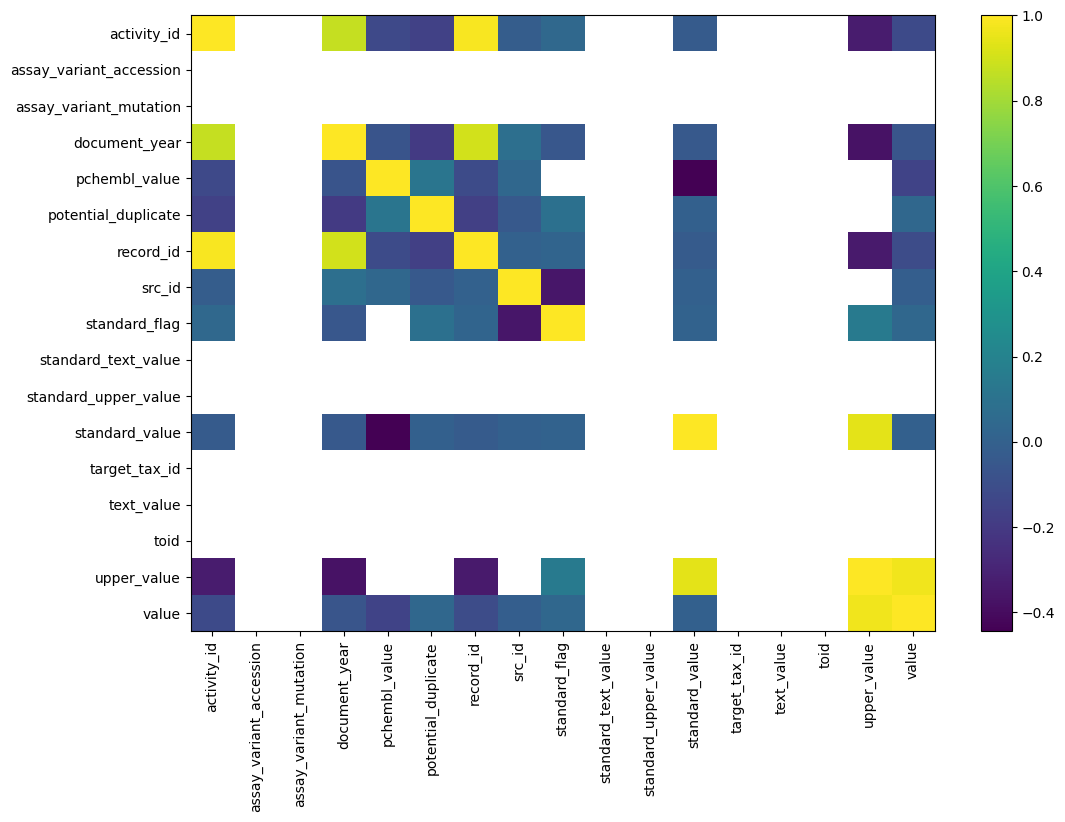

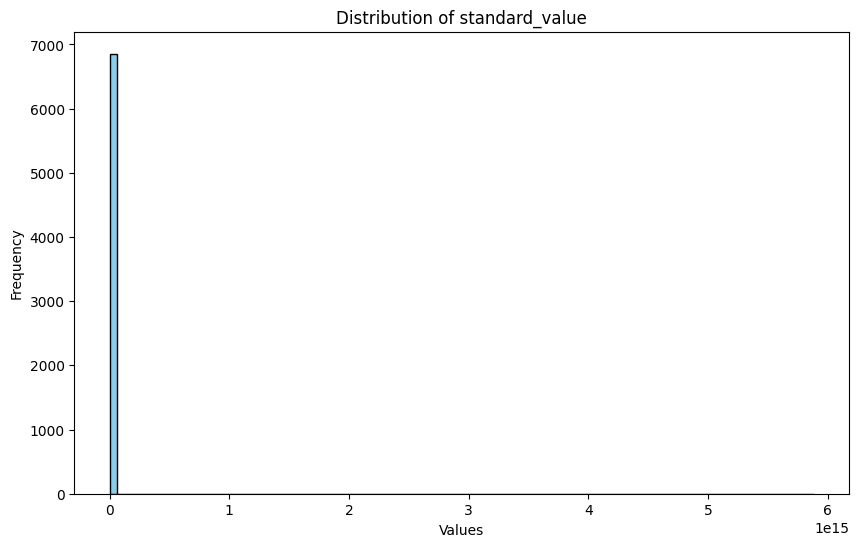

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading enhanced data
enhanced_data_path = 'enhanced_data.csv'
enhanced_df = pd.read_csv(enhanced_data_path)

# information about the DataFrame
print(enhanced_df.info())

# Summary statistics for numerical columns
print(enhanced_df.describe())

# Correlation matrix
correlation_matrix = enhanced_df.corr()
print(correlation_matrix)

# Visualizing correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

# Distribution of the 'standard_value' column with more bins
column_to_visualize = 'standard_value'
plt.figure(figsize=(10, 6))
plt.hist(enhanced_df[column_to_visualize], bins=100, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {column_to_visualize}')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
!pip install rdkit-pypi

from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd

# Loading enhanced_data.csv file
df = pd.read_csv('enhanced_data.csv')

# Loading subset of the data
subset_df = df.head(100)

# function to process SMILES strings and generate Morgan fingerprints
def process_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            return np.array(list(fingerprint))
    except:
        pass
    return None

# function to the subset of data
subset_df['morgan_fingerprint'] = subset_df['canonical_smiles'].apply(process_smiles)

print(subset_df[['canonical_smiles', 'morgan_fingerprint']])

                                     canonical_smiles  \
0               CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1   
1          O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1   
2   CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1   
3       O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F   
4           CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C   
..                                                ...   
95  CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCCCN4CCOCC4)ccc...   
96   CC[N+](C)(CC)CCS/C(=N\O)C(=O)c1ccc(C#N)cc1.[Cl-]   
97  CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCCN4CCOCC4)ccc3...   
98     COC1CCCN(Cc2ccc(CNCCN3CCNC3=C(C#N)C#N)o2)C1.Cl   
99       C[N+](C)(C)CCS/C(=N\O)C(=O)c1ccc(Br)cc1.[I-]   

                                   morgan_fingerprint  
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<ipython-input-60-cc4b9f1e1b87>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['morgan_fingerprint'] = subset_df['canonical_smiles'].apply(process_smiles)
